# Care Team Engagment Prediction - Data Analysis

This notebook includes the following steps:
<ul>
<li> Read data file </li>
<li> Analysis to define Y </li>
<li> Hot words analys </li>
<li> Examin variables distribution </li>
</ul>

### 1. Read data file (locally or from S3) 

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [280]:
%matplotlib inline

In [281]:
# Read local data file
df1 = pd.read_csv('analysisData1.csv')

In [282]:
df1.shape

(52885, 36)

In [283]:
df1.columns

Index(['days_to_first_et', 'days_to_coach', 'is_gender_female',
       'is_gender_male', 'is_gender_other', 'bio_length', 'reasons_length',
       'imagine_free_length', 'reason_limited_time',
       'reason_family_obligations', 'reason_work_obligations', 'reason_other',
       'surgery_1yr', 'pain_severity', 'pain_vas', 'pain_description_length',
       'bmi', 'gad', 'phq', 'inbound_coach_messages_4_weeks',
       'inbound_coach_messages_1_week', 'inbound_coach_messages_length_1_week',
       'inbound_member_messages_4_weeks', 'inbound_member_messages_1_week',
       'surgery_message', 'call_message', 'interaction_message',
       'video_message', 'booking_message', 'back', 'hip', 'knee', 'neck',
       'shoulder', 'hot_word', 'Y'],
      dtype='object')

### 2. Define Y

<function matplotlib.pyplot.show(*args, **kw)>

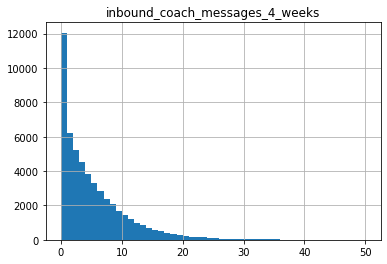

In [284]:
#df1['total_messages'] = df1['inbound_coach_messages_4_weeks'] + df1['inbound_member_messages_4_weeks']
t1 = pd.DataFrame(df1.loc[:,'inbound_coach_messages_4_weeks'])
t1.hist(range=(0,50), bins=50)
plt.show

In [285]:
# 25% of 53000 = 13,250
limit = 7

print('Our goal is to map out 25% of members, which is {0} user'.format (int(0.25* t1.shape[0])))
print('Setting inbound messages to coach (in first 4 week) limit to {0}'.format(limit))
mid_tier_count = t1[t1['inbound_coach_messages_4_weeks'] > 7].shape[0]
print('With current limit, we got {0} members'.format(mid_tier_count))

Our goal is to map out 25% of members, which is 13221 user
Setting inbound messages to coach (in first 4 week) limit to 7
With current limit, we got 12483 members


## Hot words Analysis

In [286]:
df1['hot_word']   =  df1['surgery_message'] + df1['call_message'] + df1['interaction_message'] + df1['video_message']
total_hot_words   = (df1['hot_word']            > 0).sum()
surgery_count     = (df1['surgery_message']     > 0).sum()
call_count        = (df1['call_message']        > 0).sum()
interaction_count = (df1['interaction_message'] > 0).sum()
video_count       = (df1['video_message']       > 0).sum()

print ('{0} members out of {1} actually used hot word, this is {2:2.2}%'.format(total_hot_words, df1.shape[0], total_hot_words*100/df1.shape[0]))
print ('Surgery used by {0} members'.format(surgery_count))
print ('Call used by {0} members'.format(call_count))
print ('Interaction {0} members'.format(interaction_count))
print ('Video {0} members'.format(video_count))


1250 members out of 52885 actually used hot word, this is 2.4%
Surgery used by 326 members
Call used by 836 members
Interaction 8 members
Video 147 members


In [287]:
# Is there a correlation between hot words and number of messages?

hot_word_and_chatty = np.where((df1['Y'] == True) & (df1['hot_word'] > 0),1,0).sum()
hot_word_and_not_chatty = np.where((df1['Y'] == False) & (df1['hot_word'] > 0),1,0).sum()

print ('{0} members used hot words but sent overall less then 7 messages'.format(hot_word_and_not_chatty))
print ('{0} members used hot words but sent overall more then 7 messages'.format(hot_word_and_chatty))


764 members used hot words but sent overall less then 7 messages
486 members used hot words but sent overall more then 7 messages


## Variables distibution

<function matplotlib.pyplot.show(*args, **kw)>

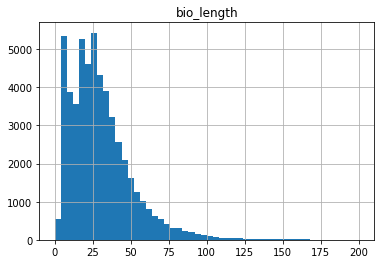

In [288]:
t2 = pd.DataFrame(df1.loc[:,'bio_length'])
t2.hist(range=(0,200), bins=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

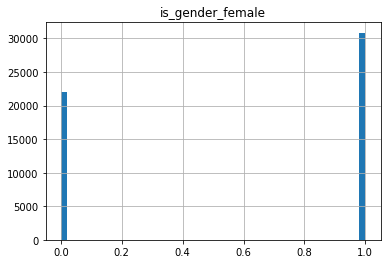

In [289]:
t3 = pd.DataFrame(df1.loc[:,'is_gender_female'])
t3.hist(range=(0,1), bins=50)
plt.show
